# Nhóm 16: PHÂN TÍCH HÀNH VI MUA HÀNG CỦA NGƯỜI TIÊU DÙNG



Phân tích hành vi mua hàng của khách hàng là phân tích chi tiết về khách hàng lý tưởng của công ty. Nó giúp doanh nghiệp hiểu rõ hơn về khách hàng của mình và giúp họ dễ dàng sửa đổi sản phẩm hơn theo nhu cầu, hành vi và mối quan tâm cụ thể của các loại khách hàng khác nhau.

Phân tích này giúp doanh nghiệp sửa đổi sản phẩm của mình dựa trên khách hàng mục tiêu từ các loại phân khúc khách hàng khác nhau. Ví dụ: thay vì chi tiền để tiếp thị sản phẩm mới tới mọi khách hàng trong cơ sở dữ liệu của công ty, công ty có thể phân tích phân khúc khách hàng nào có nhiều khả năng mua sản phẩm nhất và sau đó chỉ tiếp thị sản phẩm trên phân khúc cụ thể đó.

## IMPORTING LIBRARIES

In [1]:
import numpy as np                               
import pandas as pd                               
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Thuộc tính

Thông tin về người

ID: Mã định danh duy nhất của khách hàng

Year_Birth: Năm sinh của khách hàng

Education: Trình độ học vấn của khách hàng

Marital_Status: Tình trạng hôn nhân của khách hàng

Income: Thu nhập hàng năm của hộ gia đình khách hàng

Kidhome: Số lượng trẻ em trong hộ gia đình của khách hàng

Teenhome: Số lượng thanh thiếu niên trong hộ gia đình của khách hàng

Dt_Customer: Ngày khách hàng bắt đầu giao dịch với công ty

Recency: Số ngày kể từ lần mua hàng cuối cùng của khách hàng

Complain: 1 nếu khách hàng đã khiếu nại trong 2 năm qua, 0 nếu không

Thông tin về sản phẩm

MntWines: Số tiền chi cho rượu vang trong 2 năm qua

MntFruits: Số tiền chi cho trái cây trong 2 năm qua

MntMeatProducts: Số tiền chi cho thịt trong 2 năm qua

MntFishProducts: Số tiền chi cho cá trong 2 năm qua

MntSweetProducts: Số tiền chi cho đồ ngọt trong 2 năm qua

MntGoldProds: Số tiền chi cho vàng trong 2 năm qua

Thông tin về khuyến mãi

NumDealsPurchases: Số lần mua hàng được giảm giá

AcceptedCmp1: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch đầu tiên, 0 nếu không

AcceptedCmp2: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ hai, 0 nếu không

AcceptedCmp3: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ ba, 0 nếu không

AcceptedCmp4: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ tư, 0 nếu không

AcceptedCmp5: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ năm, 0 nếu không

Response: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch cuối cùng, 0 nếu không

Thông tin về cách thức mua hàng

NumWebPurchases: Số lần mua hàng thông qua website của công ty

NumCatalogPurchases: Số lần mua hàng bằng cách sử dụng danh mục

NumStorePurchases: Số lần mua hàng trực tiếp tại cửa hàng

NumWebVisitsMonth: Số lần ghé thăm website của công ty trong tháng qua

In [2]:
# Import the Dataset
df = pd.read_csv("marketing_campaign_extended.csv", sep="\t")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
df

ID  Year_Birth   Education Marital_Status         Income  Kidhome  \
0       5524        1957  Graduation         Single   58138.000000        0   
1       2174        1954  Graduation         Single   46344.000000        1   
2       4141        1965  Graduation       Together   71613.000000        0   
3       6182        1984  Graduation       Together   26646.000000        1   
4       5324        1981         PhD        Married   58293.000000        1   
...      ...         ...         ...            ...            ...      ...   
10235  19187        1936    2n Cycle         Single  361486.406362        0   
10236  19188        1952  Graduation       Divorced  196270.719520        2   
10237  19189        1995       Basic        Married  459828.109390        2   
10238  19190        1933         PhD           YOLO    1958.982670        0   
10239  19191        1913  Graduation           YOLO   41415.374264        1   

       Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0             0  04-09-2012       58       635  ...                  7   
1             1  08-03-2014       38        11  ...                  5   
2             0  21-08-2013       26       426  ...                  4   
3             0  10-02-2014       26        11  ...                  6   
4             0  19-01-2014       94       173  ...                  5   
...         ...         ...      ...       ...  ...                ...   
10235         2  12-01-2013       51       676  ...                 11   
10236         2  11-05-2014       80       881  ...                  7   
10237         2  24-10-2012       26       852  ...                 11   
10238         0  17-08-2013       63      1052  ...                 16   
10239         0  07-12-2012       44      1243  ...                  1   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                 0             0             0             0             0   
1                 0             0             0             0             0   
2                 0             0             0             0             0   
3                 0             0             0             0             0   
4                 0             0             0             0             0   
...             ...           ...           ...           ...           ...   
10235             1             1             1             1             0   
10236             0             0             1             1             0   
10237             0             0             0             1             1   
10238             0             1             1             0             1   
10239             0             1             0             0             0   

       Complain  Z_CostContact  Z_Revenue  Response  
0             0              3         11         1  
1             0              3         11         0  
2             0              3         11         0  
3             0              3         11         0  
4             0              3         11         0  
...         ...            ...        ...       ...  
10235         1              3         11         1  
10236         1              3         11         1  
10237         1              3         11         1  
10238         0              3         11         1  
10239         0              3         11         1  

[10240 rows x 29 columns]

In [4]:
df.info()
# In các cột


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10240 non-null  int64  
 1   Year_Birth           10240 non-null  int64  
 2   Education            10240 non-null  object 
 3   Marital_Status       10240 non-null  object 
 4   Income               10216 non-null  float64
 5   Kidhome              10240 non-null  int64  
 6   Teenhome             10240 non-null  int64  
 7   Dt_Customer          10240 non-null  object 
 8   Recency              10240 non-null  int64  
 9   MntWines             10240 non-null  int64  
 10  MntFruits            10240 non-null  int64  
 11  MntMeatProducts      10240 non-null  int64  
 12  MntFishProducts      10240 non-null  int64  
 13  MntSweetProducts     10240 non-null  int64  
 14  MntGoldProds         10240 non-null  int64  
 15  NumDealsPurchases    10240 non-null 

In [5]:
#Mô tả tập dữ liệu
df.describe()

ID    Year_Birth         Income       Kidhome      Teenhome  \
count  10240.000000  10240.000000   10216.000000  10240.000000  10240.000000   
mean   13091.644336   1950.025488  273084.965378      0.883008      0.891895   
std     4713.962844     28.784057  205073.859286      0.792079      0.791307   
min        0.000000   1893.000000    1730.000000      0.000000      0.000000   
25%    11511.750000   1926.000000   70564.424762      0.000000      0.000000   
50%    14071.500000   1955.000000  244693.549226      1.000000      1.000000   
75%    16631.250000   1974.000000  451364.023827      2.000000      2.000000   
max    19191.000000   1996.000000  666666.000000      2.000000      2.000000   

            Recency      MntWines     MntFruits  MntMeatProducts  \
count  10240.000000  10240.000000  10240.000000     10240.000000   
mean      49.525488    642.892090     83.725488       708.041016   
std       29.013563    449.300322     62.272283       533.181819   
min        0.000000      0.000000      0.000000         0.000000   
25%       24.000000    233.000000     24.000000       205.000000   
50%       50.000000    603.000000     79.000000       651.000000   
75%       75.000000   1026.000000    138.000000      1167.000000   
max       99.000000   1493.000000    199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count     10240.000000  ...       10240.000000  10240.000000  10240.000000   
mean        109.105566  ...           9.003418      0.407129      0.409961   
std          80.129802  ...           5.797363      0.491323      0.491850   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%          33.000000  ...           4.000000      0.000000      0.000000   
50%         103.000000  ...           8.000000      0.000000      0.000000   
75%         178.000000  ...          14.000000      1.000000      1.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2      Complain  Z_CostContact  \
count  10240.000000  10240.000000  10240.000000  10240.000000        10240.0   
mean       0.404492      0.410938      0.395801      0.395508            3.0   
std        0.490817      0.492028      0.489046      0.488983            0.0   
min        0.000000      0.000000      0.000000      0.000000            3.0   
25%        0.000000      0.000000      0.000000      0.000000            3.0   
50%        0.000000      0.000000      0.000000      0.000000            3.0   
75%        1.000000      1.000000      1.000000      1.000000            3.0   
max        1.000000      1.000000      1.000000      1.000000            3.0   

       Z_Revenue      Response  
count    10240.0  10240.000000  
mean        11.0      0.421680  
std          0.0      0.493852  
min         11.0      0.000000  
25%         11.0      0.000000  
50%         11.0      0.000000  
75%         11.0      1.000000  
max         11.0      1.000000  

[8 rows x 26 columns]

In [6]:
# Kiểm tra kích thước tập dữ liệu
df.shape

(10240, 29)

### Kiểm tra dữ liệu

In [7]:
# Kiểm tra các giá trị null
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# Xóa 2 cột 'Z_CostContact' và 'Z_Revenue' vì không sử dụng cho mô hình dự đoán
df = df.drop(['Z_CostContact', 'Z_Revenue'],axis=1)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [9]:
plt.rcParams.update(plt.rcParamsDefault)

#### Kiểm tra mức độ tương quan giữa các thuộc tính

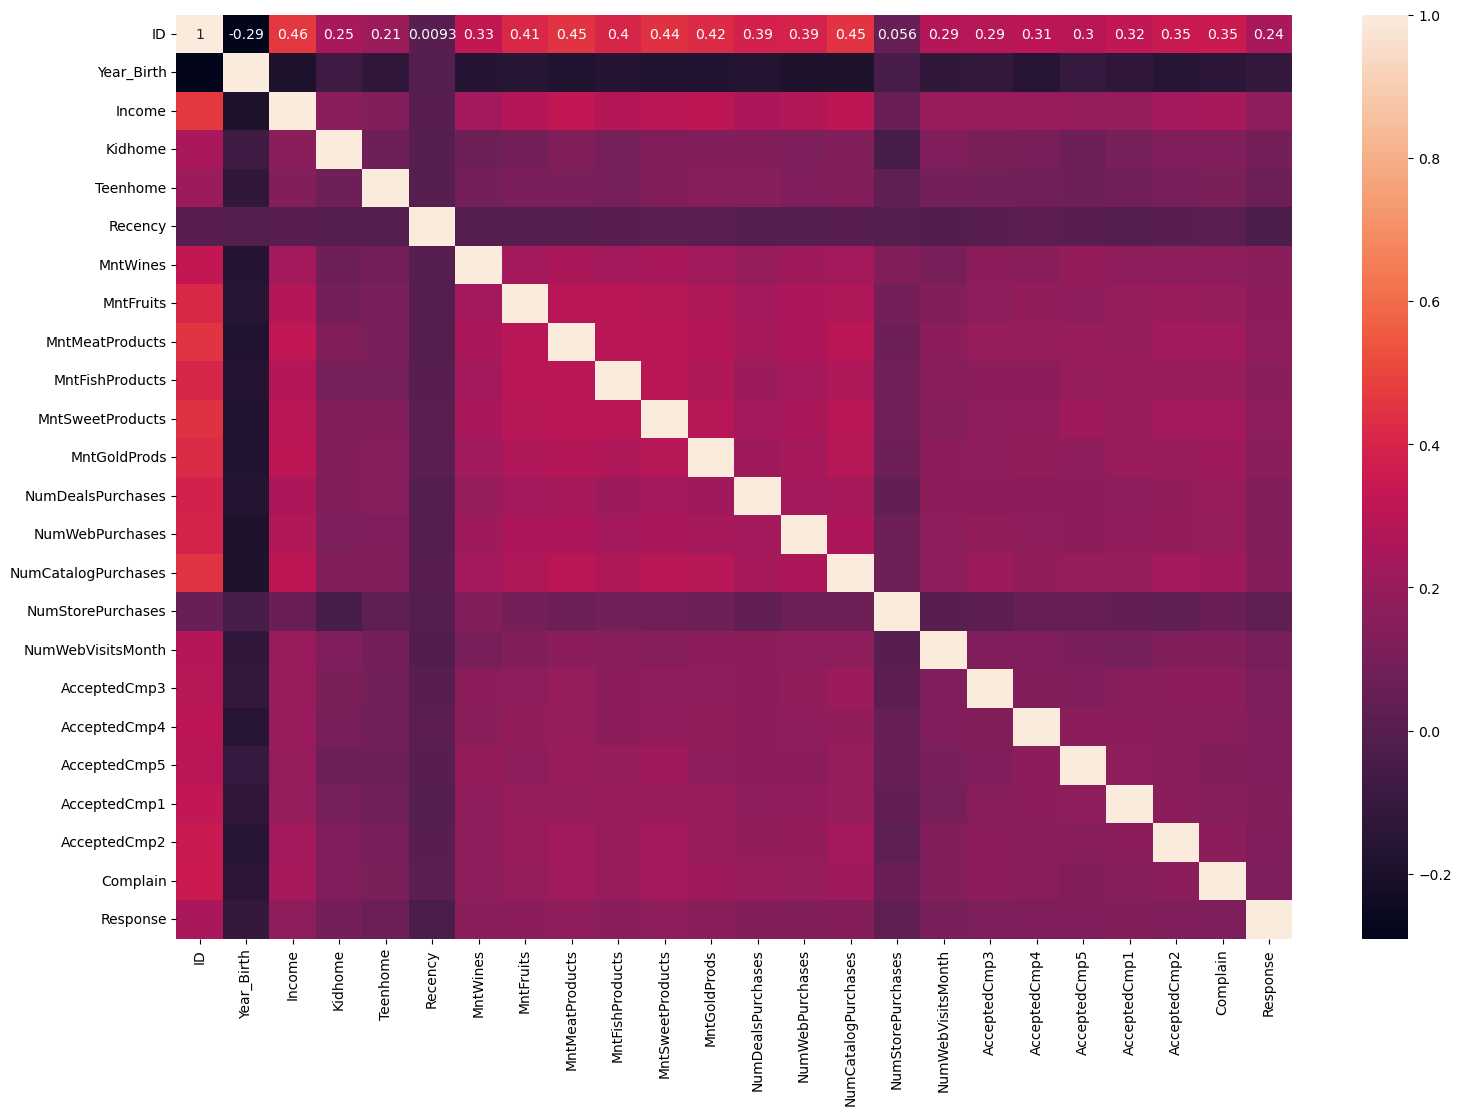

In [10]:
# Loại bỏ các cột không phải số
numeric_df = df.select_dtypes(include=['number'])

#  Tạo ra một biểu đồ heatmap để trực quan hóa mức độ tương quan giữa các cột số
plt.figure(figsize=(18,12))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


### Kiểm tra tương quan bằng cách unstack dữ liệu

Được sử dụng để tính toán mức độ tương quan hoặc phụ thuộc giữa hai biến.

Các giá trị cực đại biểu thị mức độ tương quan cao.

Các biến đa cộng tuyến với mức độ tương quan lớn hơn một ngưỡng thường được loại bỏ khỏi tập dữ liệu.

In [11]:
# Loại bỏ các cột không phải số
numeric_df = df.select_dtypes(include=['number'])

# Tính toán ma trận tương quan
corr_data = numeric_df.corr()

# Sắp xếp và hiển thị các giá trị tương quan
corr_values = corr_data.abs().unstack().sort_values(ascending=False)
print(corr_values[24:50:2])


ID                   Income               0.464010
MntMeatProducts      ID                   0.447828
NumCatalogPurchases  ID                   0.445960
MntSweetProducts     ID                   0.441855
ID                   MntGoldProds         0.422484
MntFruits            ID                   0.413261
ID                   MntFishProducts      0.400424
                     NumWebPurchases      0.394164
                     NumDealsPurchases    0.385164
                     Complain             0.354324
AcceptedCmp2         ID                   0.348798
MntWines             ID                   0.327529
MntMeatProducts      Income               0.322219
dtype: float64


### Tiền xử lý

In [12]:
#Điền giá trị thiếu vào cột “Income” bằng giá trị trung bình
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [13]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [14]:
# Kiểm tra số lượng danh mục duy nhất có trong cột "Marital_Status"
df['Marital_Status'].value_counts()  

Marital_Status
Married     1844
Together    1540
Single      1432
Divorced    1289
Widow       1113
Absurd      1029
YOLO        1011
Alone        982
Name: count, dtype: int64

##### Chuyển đổi cột "Marital_Status" thành dữ liệu phân loại và hiển thị số lượng mẫu trong mỗi danh mục

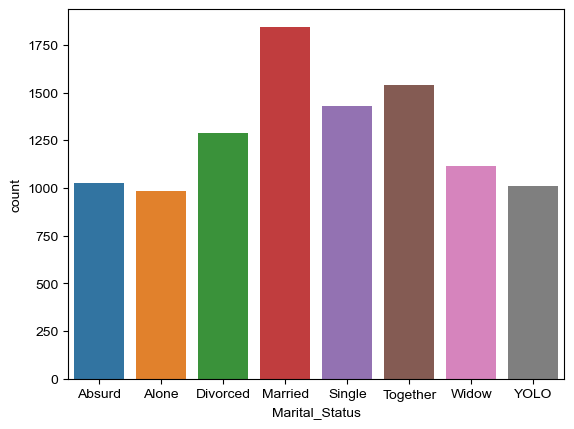

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chuyển đổi cột "Marital_Status" thành dữ liệu phân loại
df['Marital_Status'] = df['Marital_Status'].astype('category')

# Vẽ biểu đồ countplot
sns.countplot(data=df, x='Marital_Status')
sns.set(rc={'figure.figsize':(4,4)})
plt.show()


In [16]:
# Nhóm 'Married', 'Together' lại thành "relationship"
# 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' được nhóm lại thành "Single"
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

##In the above cell we are grouping 'Married', 'Together' as "relationship"
##Whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as "Single"

In [17]:
# Số lượng mỗi giá trị khác nhau trong Marital_Status
df['Marital_Status'].value_counts()  

Marital_Status
Single          6856
relationship    3384
Name: count, dtype: int64

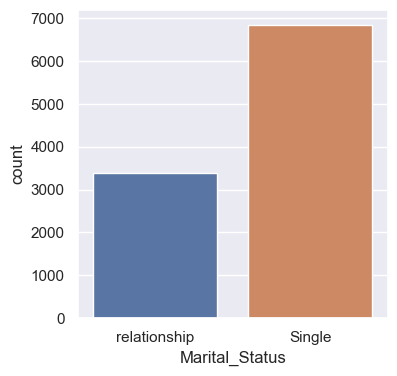

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chuyển đổi cột "Marital_Status" thành dữ liệu phân loại
df['Marital_Status'] = df['Marital_Status'].astype('category')

# Vẽ biểu đồ countplot sau khi nhóm
sns.countplot(data=df, x='Marital_Status')
sns.set(rc={'figure.figsize':(4,4)})
plt.show()


Tách các sản phẩm thành các DataFrame riêng biệt để sử dụng cho việc khai thác luật kết hợp

In [19]:
product_data = []
for i in range(0, len(df)):
  productdata = [df['MntWines'][i], df['MntFruits'][i], 
                  df['MntMeatProducts'][i], df['MntFishProducts'][i], 
                  df['MntSweetProducts'][i], df['MntGoldProds'][i]]
  product_data.append(productdata)
Products_DF = pd.DataFrame(product_data, columns = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'])
Products_DF.head()

Wines  Fruits  Meat  Fish  Sweets  Gold
0    635      88   546   172      88    88
1     11       1     6     2       1     6
2    426      49   127   111      21    42
3     11       4    20    10       3     5
4    173      43   118    46      27    15

In [20]:
# Kết hợp các DataFrame khác nhau thành một cột duy nhất để giảm số chiều. 
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [21]:
#Xóa một số cột để giảm kích thước và độ phức tạp của mô hình
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

ID  Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  \
0  5524        1957  Graduation         Single  58138.0  04-09-2012       58   
1  2174        1954  Graduation         Single  46344.0  08-03-2014       38   
2  4141        1965  Graduation   relationship  71613.0  21-08-2013       26   
3  6182        1984  Graduation   relationship  26646.0  10-02-2014       26   
4  5324        1981         PhD   relationship  58293.0  19-01-2014       94   

   Complain  Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases  
0         0     0      1617                 1                 25  
1         0     2        27                 0                  6  
2         0     0       776                 0                 21  
3         0     1        53                 0                  8  
4         0     1       422                 0                 19

### Thêm cột 'Age' bằng cách lấy 2015 trừ đi giá trị cột Year_Birth


In [22]:
df['Age'] = 2015 - df["Year_Birth"]

In [23]:
# Số lượng các giá trị khác nhau có trong Education
df['Education'].value_counts()

Education
Graduation    2737
PhD           2165
Master        1930
2n Cycle      1770
Basic         1638
Name: count, dtype: int64

In [24]:
# Chuyển đổi các giá trị trong cột Education thành UG và PG

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

Số ngày mà một khách hàng đã tương tác với công ty

In [25]:
# Chuyển đổi cột Dt_customer thành định dạng timestamp
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [26]:
# Loại bỏ các cột không cần thiết
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(10240, 9)

In [27]:
df.head()

Education Marital_Status   Income  Kids  Expenses  TotalAcceptedCmp  \
0        PG         Single  58138.0     0      1617                 1   
1        PG         Single  46344.0     2        27                 0   
2        PG   relationship  71613.0     0       776                 0   
3        PG   relationship  26646.0     1        53                 0   
4        PG   relationship  58293.0     1       422                 0   

   NumTotalPurchases  Age  day_engaged  
0                 25   58          849  
1                  6   61          299  
2                 21   50          498  
3                  8   31          325  
4                 19   34          347

# **VISUALIZATION**

In [28]:
plt.rcParams.update(plt.rcParamsDefault)

##### Mối tương quan giữa tình trạng hôn nhân và các khoản chi tiêu dựa trên trình độ học vấn


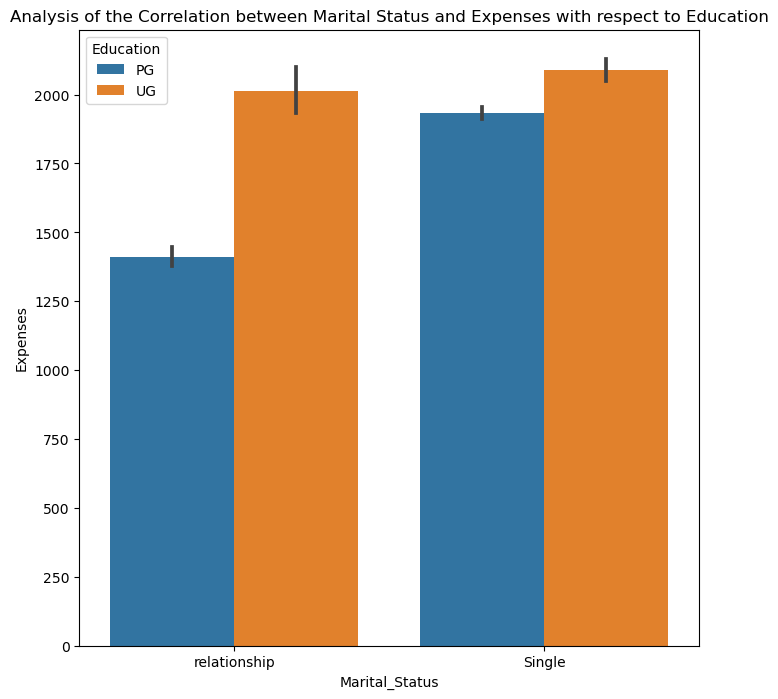

In [29]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Marital_Status'], y=df['Expenses'], hue = df["Education"])
plt.title("Analysis of the Correlation between Marital Status and Expenses with respect to Education")
plt.show()

Phần bên trái hiển thị chi tiêu của các nhóm đã có gia đình theo mức độ học vấn.
Phần bên phải hiển thị chi tiêu của các nhóm độc thân theo mức độ học vấn.
Nhìn chung, biểu đồ cho thấy:

Chi tiêu tăng theo mức độ học vấn đối với cả hai nhóm độc thân và đã có gia đình.
Nhóm đã có gia đình có mức chi tiêu thấp hơn nhóm độc thân ở tất cả các mức độ học vấn.


##### Phân phối của các khoản chi tiêu theo tình trạng hôn nhân

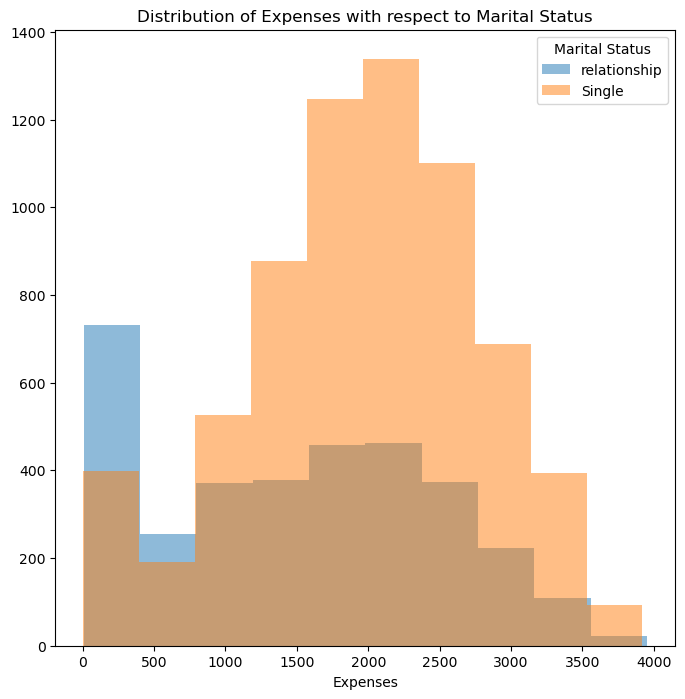

In [31]:
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Expenses", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Expenses with respect to Marital Status")
plt.xlabel("Expenses")
plt.legend(title = "Marital Status")
plt.show()

##### Phân phối của các khoản chi tiêu theo trình độ học vấn

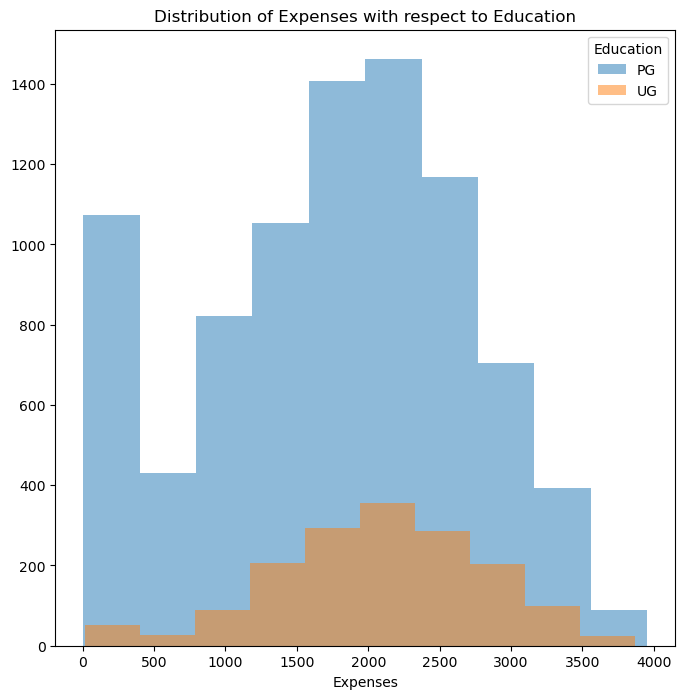

In [32]:
#from numpy.core.fromnumeric import size
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = df[df["Education"] == "PG"], alpha = 0.5, label = "PG")
plt.hist("Expenses", data = df[df["Education"] == "UG"], alpha = 0.5, label = "UG")
plt.title("Distribution of Expenses with respect to Education")
plt.xlabel("Expenses")
plt.legend(title = "Education")
plt.show()

##### Phân phối tổng chi tiêu theo trình độ học vấn

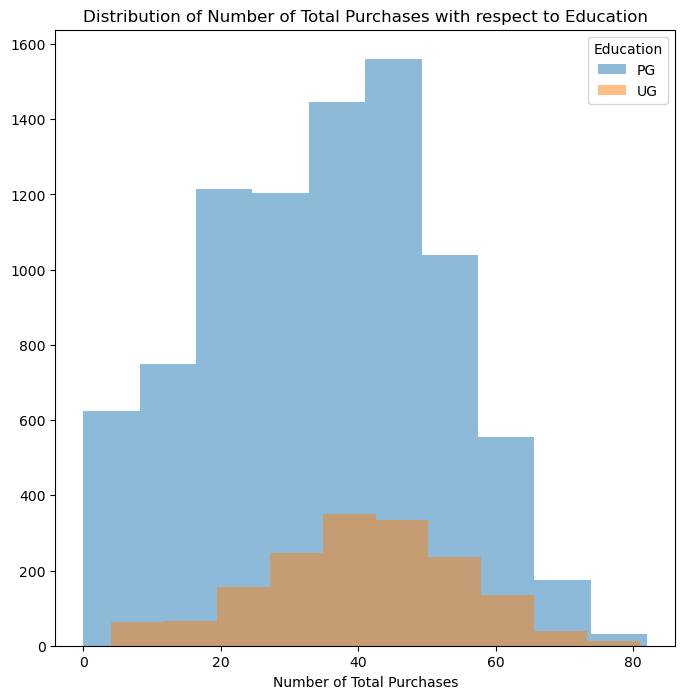

In [33]:
plt.figure(figsize=(8,8))
plt.hist("NumTotalPurchases", data = df[df["Education"] == "PG"], alpha = 0.5, label = "PG")
plt.hist("NumTotalPurchases", data = df[df["Education"] == "UG"], alpha = 0.5, label = "UG")
plt.title("Distribution of Number of Total Purchases with respect to Education")
plt.xlabel("Number of Total Purchases")
plt.legend(title = "Education")
plt.show()

##### Phân phối tuổi theo tình trạng hôn nhân

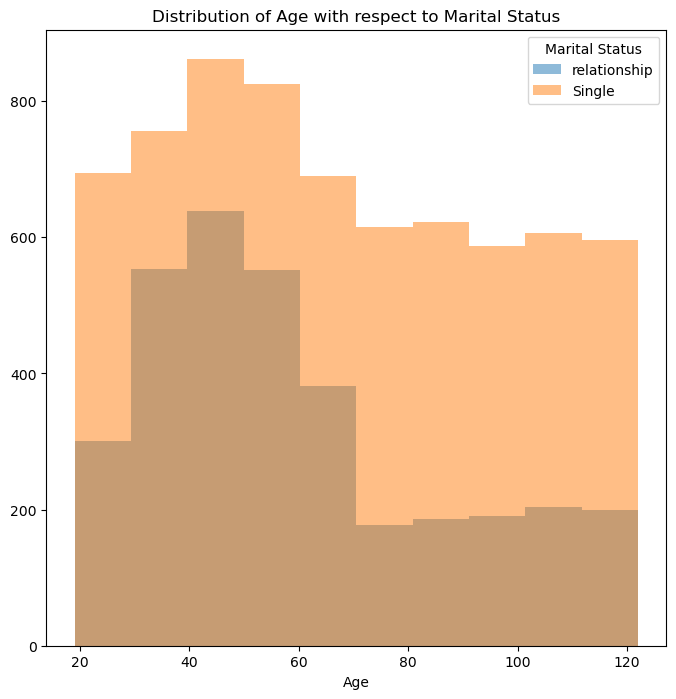

In [34]:
plt.figure(figsize=(8,8))
plt.hist("Age", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Age", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Age with respect to Marital Status")
plt.xlabel("Age")
plt.legend(title = "Marital Status")
plt.show()

##### Phân phối thu nhập theo tình trạng hôn nhân

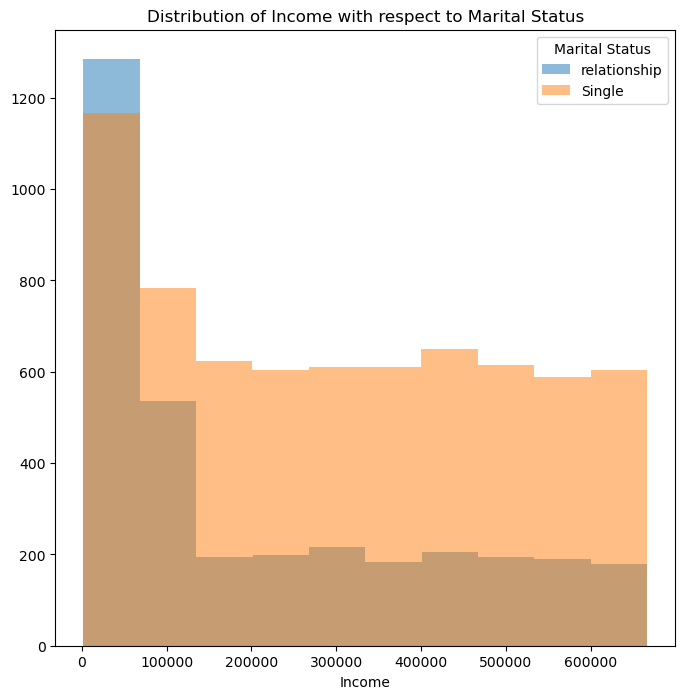

In [35]:
plt.figure(figsize=(8,8))
plt.hist("Income", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Income", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Income with respect to Marital Status")
plt.xlabel("Income")
plt.legend(title = "Marital Status")
plt.show()

##### Tỉ lệ khách hàng theo tình trạng hôn nhân

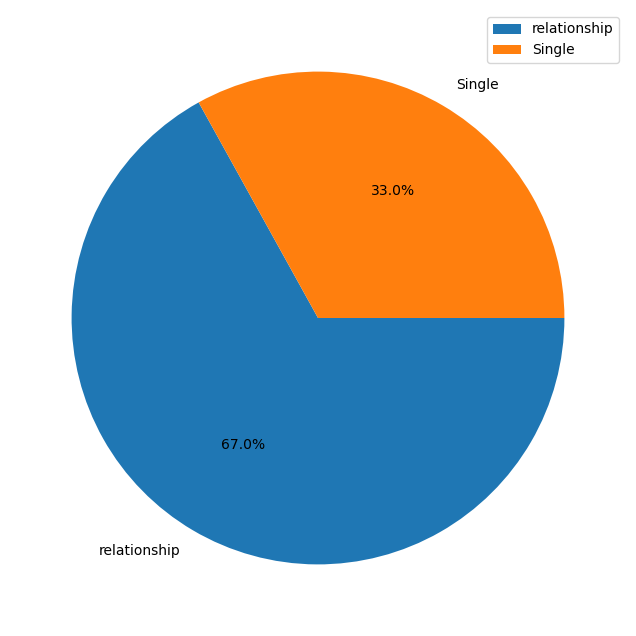

In [36]:
plt.figure(figsize=(8,8))
plt.pie(df["Marital_Status"].value_counts(), labels = ["relationship", "Single"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

Tỷ lệ nhóm đã có gia đình (67%) cao hơn nhiều so với tỷ lệ nhóm độc thân (33%).

##### Tỉ lệ khách hàng theo trình độ học vấn

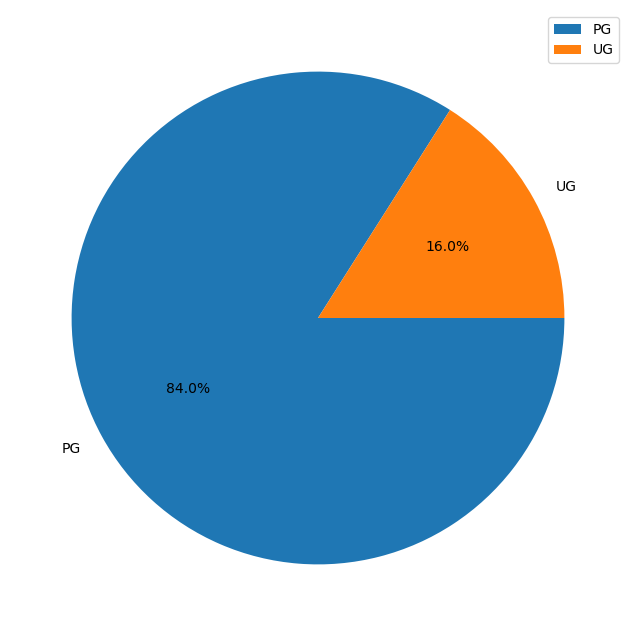

In [37]:
plt.figure(figsize=(8,8))
plt.pie(df["Education"].value_counts(), labels = ["PG", "UG"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

Tỷ lệ phần trăm của PG cao hơn so với UG.
Tỷ lệ phần trăm của PG là 84%.
Tỷ lệ phần trăm của UG là 16%.

##### Tổng chi tiêu dựa trên trình độ học vấn

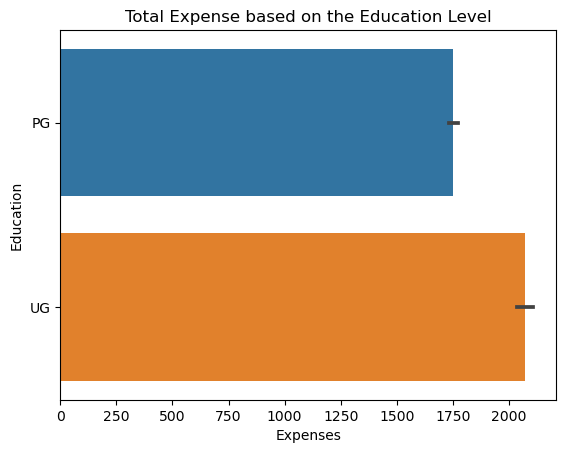

In [38]:
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expense based on the Education Level');
plt.show()

##### Tổng thu nhập dựa trên trình độ học vấn

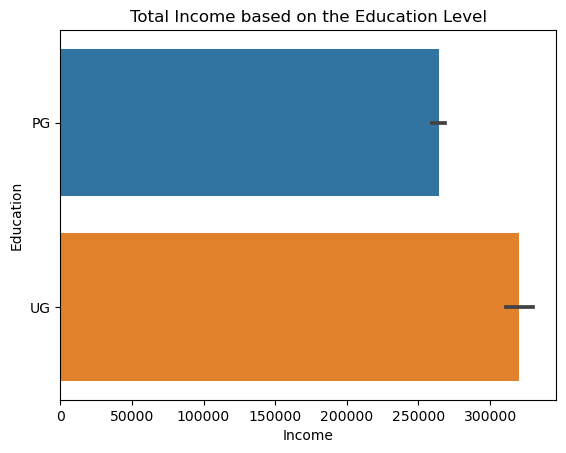

In [39]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income based on the Education Level');
plt.show()

In [40]:
df.describe()

Income          Kids      Expenses  TotalAcceptedCmp  \
count   10240.000000  10240.000000  10240.000000      10240.000000   
mean   273084.965378      1.774902   1803.342578          2.450000   
std    204833.373880      1.160107    914.158214          1.579251   
min      1730.000000      0.000000      5.000000          0.000000   
25%     70632.750000      1.000000   1209.750000          1.000000   
50%    245809.687093      2.000000   1901.500000          3.000000   
75%    450679.316605      3.000000   2465.000000          4.000000   
max    666666.000000      4.000000   3952.000000          6.000000   

       NumTotalPurchases           Age   day_engaged  
count       10240.000000  10240.000000  10240.000000  
mean           35.679395     64.974512    536.808105  
std            16.430864     28.784057    203.139499  
min             0.000000     19.000000    186.000000  
25%            23.000000     41.000000    360.750000  
50%            37.000000     60.000000    538.000000  
75%            48.000000     89.000000    714.000000  
max            82.000000    122.000000    885.000000

## LABEL ENCODING(Mã hóa NHÃN)

In [41]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education']


In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 

In [43]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [44]:
df1 = df.copy()

In [45]:
df1.head(3)

Education Marital_Status   Income  Kids  Expenses  TotalAcceptedCmp  \
0          0         Single  58138.0     0      1617                 1   
1          0         Single  46344.0     2        27                 0   
2          0   relationship  71613.0     0       776                 0   

   NumTotalPurchases  Age  day_engaged  
0                 25   58          849  
1                  6   61          299  
2                 21   50          498

## OUTLIERS DETECTION

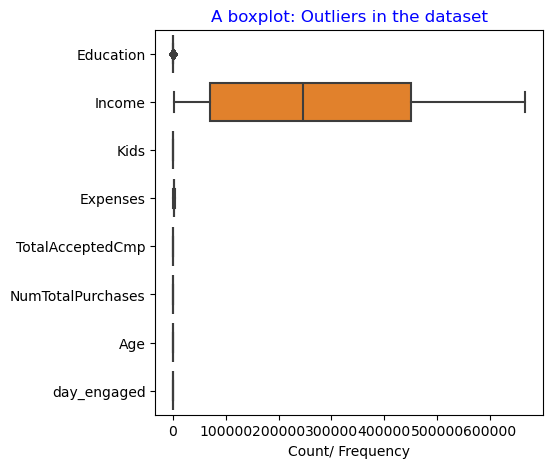

In [46]:
# check for outliers
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df1 , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

# **K-MEANS CLUSTERING**

In [47]:
# Chuyển đổi giá trị của cột 'Marital_Status'
df1['Marital_Status'] = df1['Marital_Status'].map({'Single': 0, 'relationship': 1})

# Kiểm tra lại DataFrame
print(df1.head())

   Education Marital_Status   Income  Kids  Expenses  TotalAcceptedCmp  \
0          0              0  58138.0     0      1617                 1   
1          0              0  46344.0     2        27                 0   
2          0              1  71613.0     0       776                 0   
3          0              1  26646.0     1        53                 0   
4          0              1  58293.0     1       422                 0   

   NumTotalPurchases  Age  day_engaged  
0                 25   58          849  
1                  6   61          299  
2                 21   50          498  
3                  8   31          325  
4                 19   34          347  


In [48]:
from sklearn.cluster import KMeans

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df1.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df1[column] = le.fit_transform(df1[column])
    label_encoders[column] = le


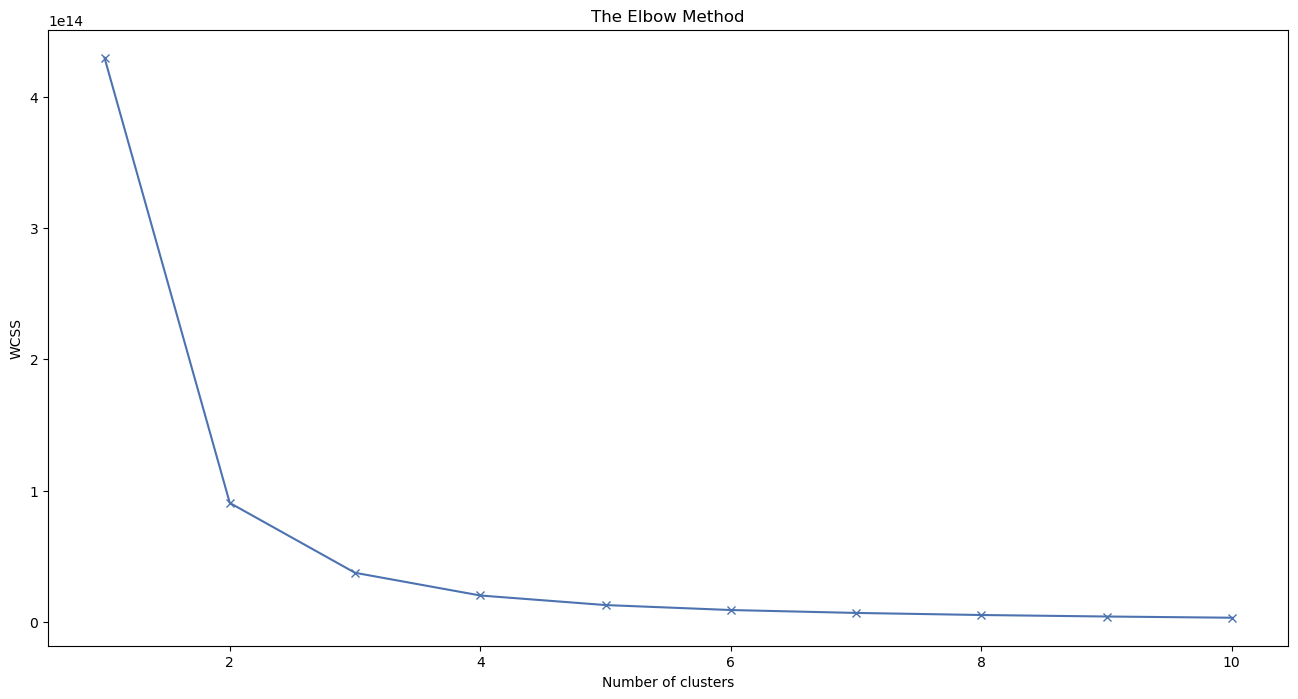

In [50]:
wcss=[] ##Initializing the list for the values of WCSS  
for i in range (1,11): #for diferent values of k ranging from 1 to 10
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(df1)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##As it is not very clear from the elbow method that which value of K to choose.


## Silhouette Score

In [51]:
from sklearn.metrics import silhouette_score 

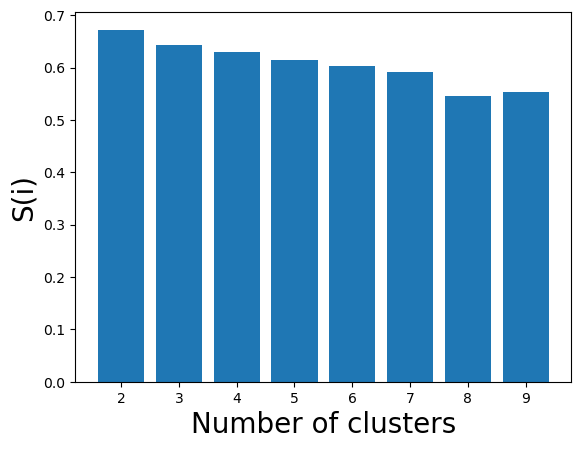

In [52]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(df1)
    silhouette_scores.append(silhouette_score(df1, m1.fit_predict(df1))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

##Here we are using Silhouette score to measure the value of K

In [53]:
silhouette_scores

[0.6722822047365629,
 0.6435411323017326,
 0.6300870766412148,
 0.6149693495955919,
 0.6030492713649216,
 0.5922445525624778,
 0.5457519151531773,
 0.5525418003835171]

In [54]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


## Model Building


In [55]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(df1)
pred=kmeans.predict(df1)


# Appending those cluster value into main dataframe (without standard-scalar)

df1['cluster'] = pred + 1

In [56]:
df1.head()

Education Marital_Status   Income  Kids  Expenses  TotalAcceptedCmp  \
0          0              0  58138.0     0      1617                 1   
1          0              0  46344.0     2        27                 0   
2          0              1  71613.0     0       776                 0   
3          0              1  26646.0     1        53                 0   
4          0              1  58293.0     1       422                 0   

   NumTotalPurchases  Age  day_engaged  cluster  
0                 25   58          849        1  
1                  6   61          299        1  
2                 21   50          498        1  
3                  8   31          325        1  
4                 19   34          347        1

## Clustering

In [57]:
df1['cluster'].value_counts()

cluster
1    5778
2    4462
Name: count, dtype: int64

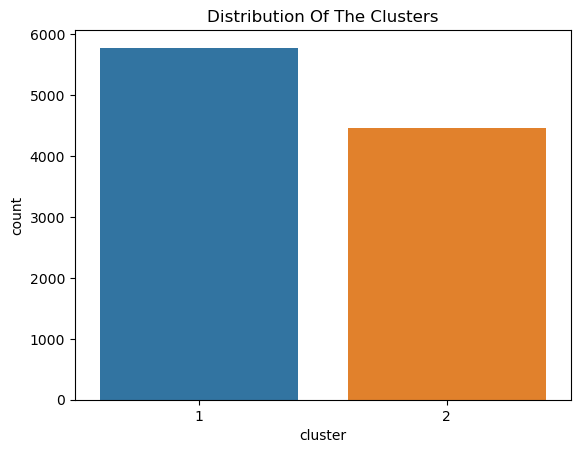

In [58]:
pl = sns.countplot(x=df1["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

## OBSERVATIONS :

As we can see here that weightage of customer are more in cluster 1 as compare to other.

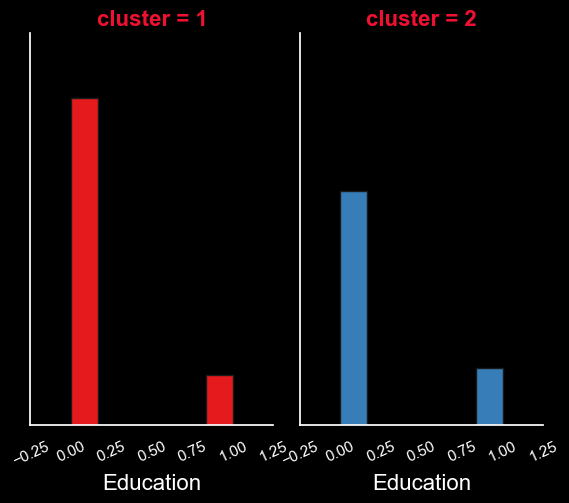

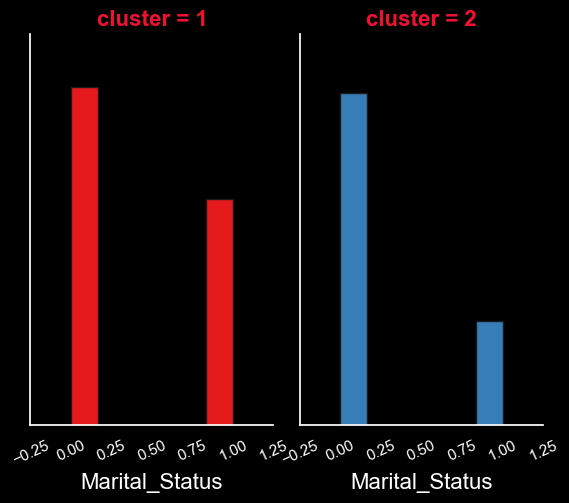

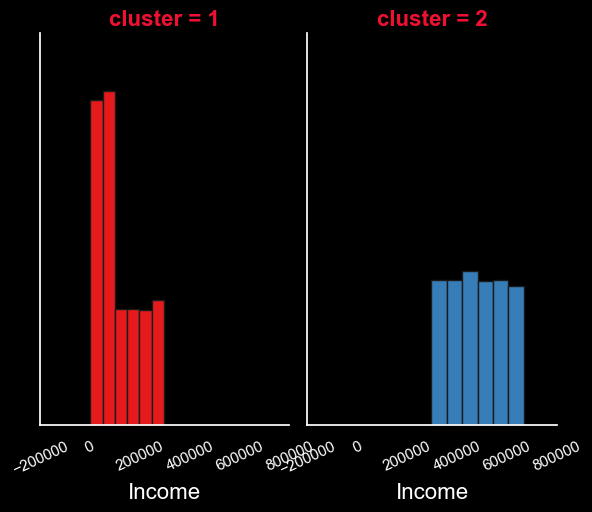

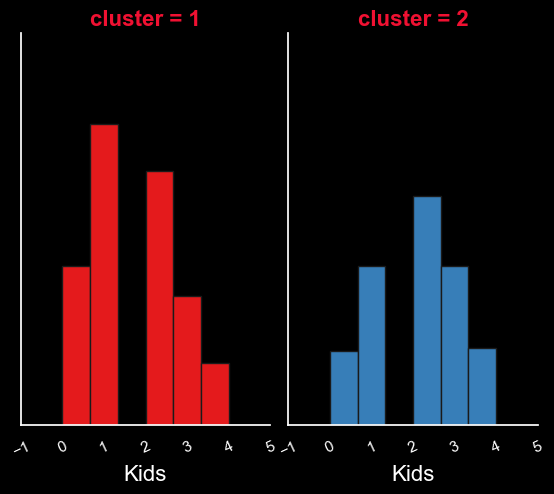

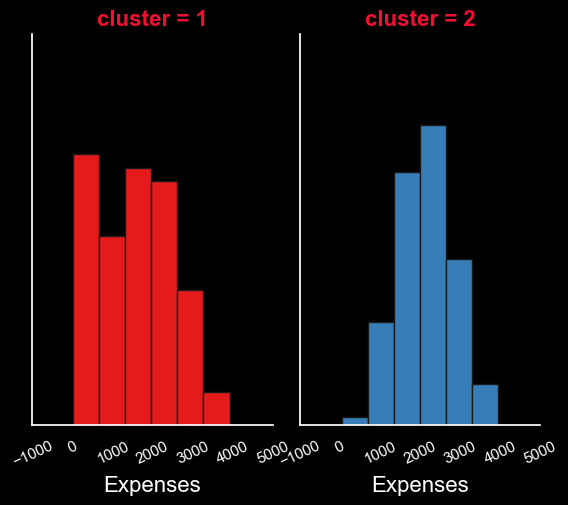

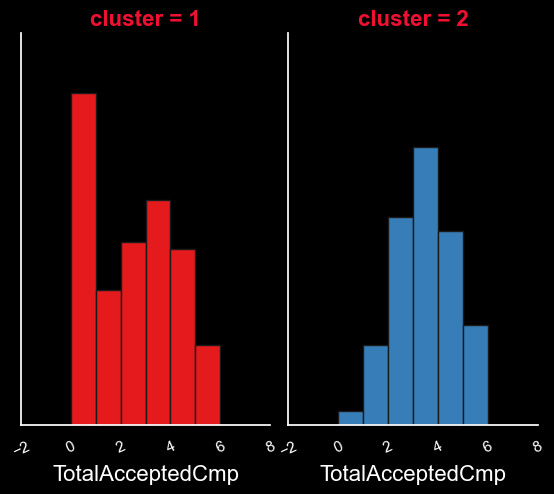

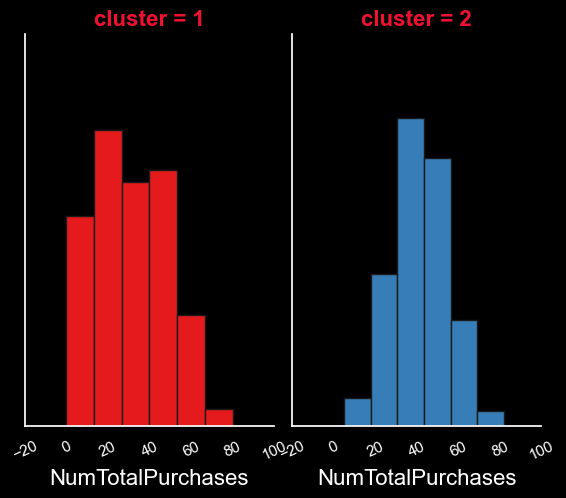

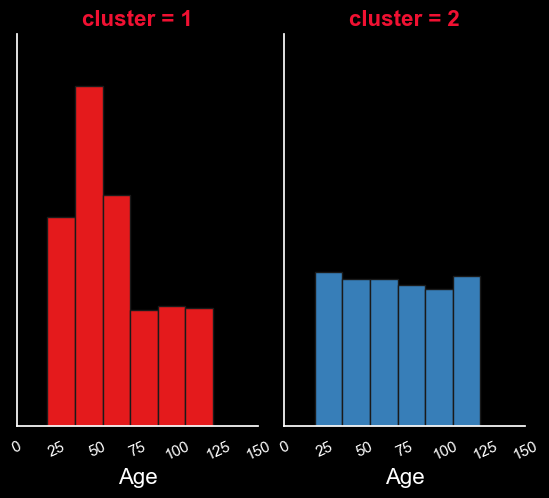

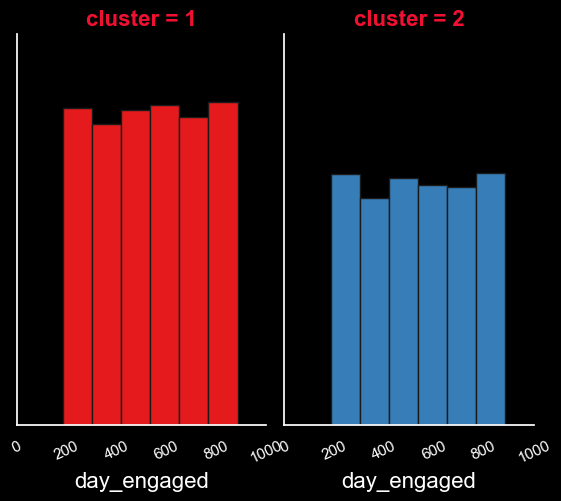

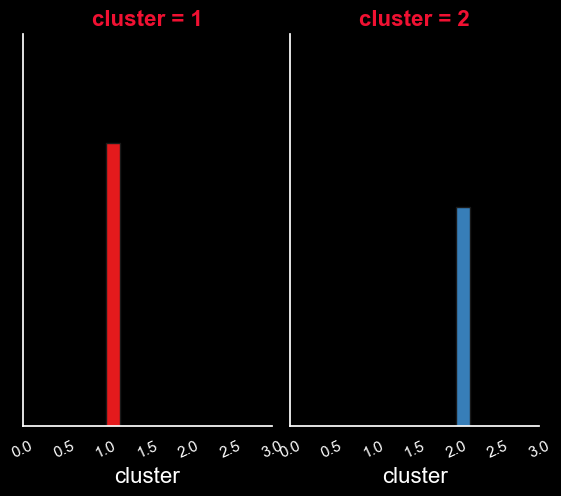

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Change 'Ubuntu' to a different font name, e.g., 'Arial'
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Arial'})

for i in df1:
    diag = sns.FacetGrid(df1, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

plt.show()


## QUAN SÁT: Dựa vào thông tin trên chúng ta có thể chia khách hàng thành 2 phần:
Highly Active Customer :- These customers belong to cluster one.

Least Active Customer :- These customers belong to cluster two.

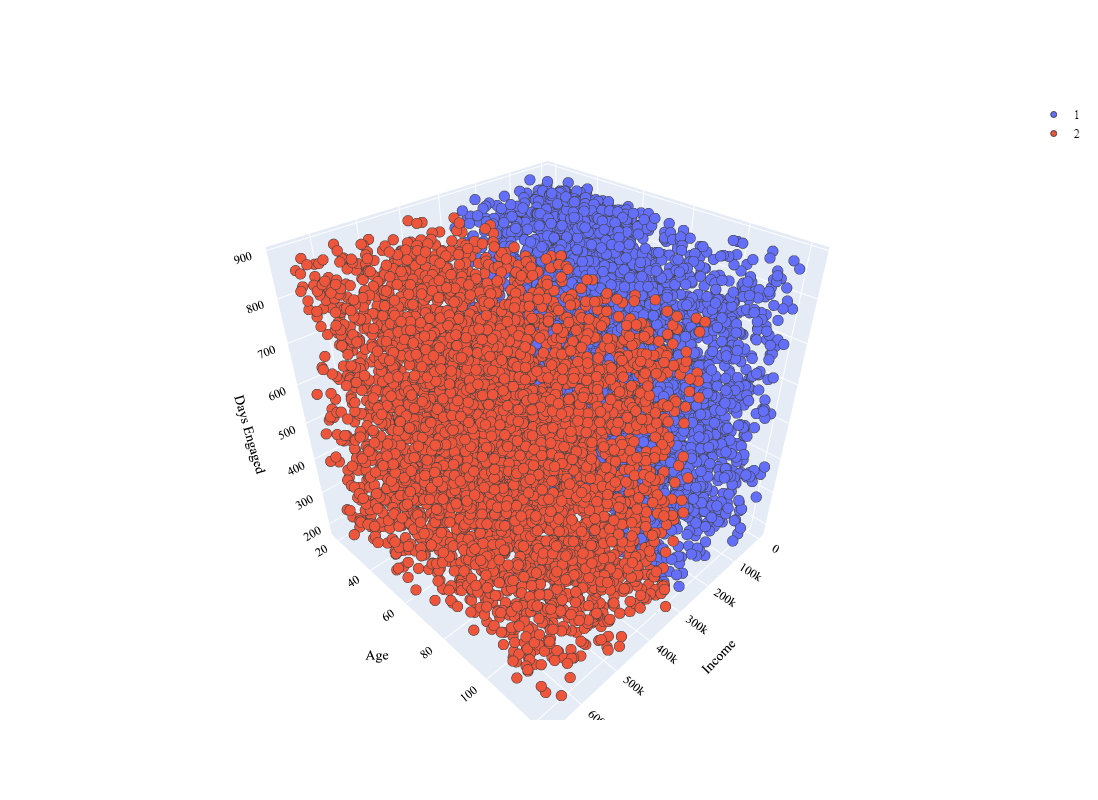

In [60]:
PLOT = go.Figure()
for C in list(df1.cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = df1[df1.cluster == C]['Income'],
                                y = df1[df1.cluster == C]['Age'],
                                z = df1[df1.cluster == C]['day_engaged'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Age: %{y} <br>Days Engaged: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Age', titlefont_color = 'black'),
                                zaxis=dict(title = 'Days Engaged', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

#MODEL EVALUATION

In [61]:
#kmeans

from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix \n",confusion_matrix(kmeans.labels_, pred))
print("classification report \n", classification_report(kmeans.labels_, pred))

ConfusionMatrix 
 [[5778    0]
 [   0 4462]]
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5778
           1       1.00      1.00      1.00      4462

    accuracy                           1.00     10240
   macro avg       1.00      1.00      1.00     10240
weighted avg       1.00      1.00      1.00     10240



# **ASSOCIATION RULE MINING: APRIORI ALGORITHM**

Khai phá quy tắc kết hợp được sử dụng khi chúng ta muốn tìm mối liên kết giữa các đối tượng khác nhau trong một tập hợp, tìm các mẫu thường xuyên trong cơ sở dữ liệu giao dịch.

Thuật toán Apriori là kỹ thuật đơn giản nhất để xác định mối quan hệ cơ bản giữa các loại phần tử khác nhau.

Ở đây chúng ta sử dụng thuật toán này để tìm ra khách hàng nào phù hợp nhất cho một mặt hàng nhất định. Qua đó giúp doanh nghiệp quảng bá đúng đối tượng khách hàng mục tiêu để tăng hiệu quả và tiết kiệm chi phí.

In [62]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [63]:
!pip install mlxtend


In [64]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Chuẩn bị dữ liệu cho thuật toán Apriori

In [65]:
data = df1.copy()
data.head()

Education Marital_Status   Income  Kids  Expenses  TotalAcceptedCmp  \
0          0              0  58138.0     0      1617                 1   
1          0              0  46344.0     2        27                 0   
2          0              1  71613.0     0       776                 0   
3          0              1  26646.0     1        53                 0   
4          0              1  58293.0     1       422                 0   

   NumTotalPurchases  Age  day_engaged  cluster  
0                 25   58          849        1  
1                  6   61          299        1  
2                 21   50          498        1  
3                  8   31          325        1  
4                 19   34          347        1

In [66]:
#Tạo phân khúc Độ tuổi
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
data['Age_group'] = pd.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)
#Tạo phân khúc thu nhập
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group'] = pd.qcut(data['Income'], q=4, labels=cut_labels_Income)
#Tạo phân khúc tương tác trong ngày
cut_labels_dayengaged = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
data['dayengaged_group'] = pd.qcut(data['day_engaged'], q=4, labels=cut_labels_dayengaged)
data=data.drop(columns=['Age','Income','day_engaged']) #xóa các cột gốc


Việc xác định các phân khúc mới theo mức chi tiêu của khách hàng cho từng sản phẩm sẽ dựa trên:

Cluster 1 - Highly Active Customer

Cluster 2 - Least Active Customer


In [67]:
#Tạo 2 nhãn dùng để gán cho các phân đoạn
cut_labels = ['Least Active Customer', 'Highly Active Customer']

data['Wines_segment'] = pd.qcut(Products_DF['Wines'][Products_DF['Wines']>0],q=[0, 0.5 ,1], labels=cut_labels).astype("object")
data['Fruits_segment'] = pd.qcut(Products_DF['Fruits'][Products_DF['Fruits']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Meat_segment'] = pd.qcut(Products_DF['Meat'][Products_DF['Meat']>0],q=[0, 0.5,1], labels=cut_labels).astype("object")
data['Fish_segment'] = pd.qcut(Products_DF['Fish'][Products_DF['Fish']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Sweets_segment'] = pd.qcut(Products_DF['Sweets'][Products_DF['Sweets']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Gold_segment'] = pd.qcut(Products_DF['Gold'][Products_DF['Gold']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
#Thay thế các giá trị NaN (khách hàng không mua sản phẩm) bằng "Inactive Customer"
data.replace(np.nan, "Inactive Customer",inplace=True) 
data = data.astype(object) #Chuyển đổi kiểu dữ liệu của toàn bộ DataFrame data sang kiểu object

In [68]:
data.head()

Education Marital_Status Kids Expenses TotalAcceptedCmp NumTotalPurchases  \
0         0              0    0     1617                1                25   
1         0              0    2       27                0                 6   
2         0              1    0      776                0                21   
3         0              1    1       53                0                 8   
4         0              1    1      422                0                19   

  cluster Age_group          Income_group       dayengaged_group  \
0       1    Mature            Low income          Old customers   
1       1    Mature            Low income          New customers   
2       1    Mature  Low to medium income  Discovering customers   
3       1     Adult            Low income          New customers   
4       1     Adult            Low income          New customers   

            Wines_segment          Fruits_segment           Meat_segment  \
0  Highly Active Customer  Highly Active Customer  Least Active Customer   
1   Least Active Customer   Least Active Customer  Least Active Customer   
2   Least Active Customer   Least Active Customer  Least Active Customer   
3   Least Active Customer   Least Active Customer  Least Active Customer   
4   Least Active Customer   Least Active Customer  Least Active Customer   

             Fish_segment         Sweets_segment           Gold_segment  
0  Highly Active Customer  Least Active Customer  Least Active Customer  
1   Least Active Customer  Least Active Customer  Least Active Customer  
2  Highly Active Customer  Least Active Customer  Least Active Customer  
3   Least Active Customer  Least Active Customer  Least Active Customer  
4   Least Active Customer  Least Active Customer  Least Active Customer

# Applying Apriori Algorithm

In [69]:
# thiết lập các tùy chọn hiển thị trong pandas
pd.set_option('display.max_columns', None) #Hiển thị tất cả các cột
pd.set_option('display.max_rows', None) #Hiển thị tất cả các hàng
pd.set_option('display.max_colwidth', 999) #Hiển thị toàn bộ độ rộng của các cột
pd.options.display.float_format = "{:.3f}".format #Định dạng hiển thị số thập phân

In [70]:
#copy dữ liệu cũ vào dataframe association và kiểu tra nó
association = data.copy() 
association.head()

Education Marital_Status Kids Expenses TotalAcceptedCmp NumTotalPurchases  \
0         0              0    0     1617                1                25   
1         0              0    2       27                0                 6   
2         0              1    0      776                0                21   
3         0              1    1       53                0                 8   
4         0              1    1      422                0                19   

  cluster Age_group          Income_group       dayengaged_group  \
0       1    Mature            Low income          Old customers   
1       1    Mature            Low income          New customers   
2       1    Mature  Low to medium income  Discovering customers   
3       1     Adult            Low income          New customers   
4       1     Adult            Low income          New customers   

            Wines_segment          Fruits_segment           Meat_segment  \
0  Highly Active Customer  Highly Active Customer  Least Active Customer   
1   Least Active Customer   Least Active Customer  Least Active Customer   
2   Least Active Customer   Least Active Customer  Least Active Customer   
3   Least Active Customer   Least Active Customer  Least Active Customer   
4   Least Active Customer   Least Active Customer  Least Active Customer   

             Fish_segment         Sweets_segment           Gold_segment  
0  Highly Active Customer  Least Active Customer  Least Active Customer  
1   Least Active Customer  Least Active Customer  Least Active Customer  
2  Highly Active Customer  Least Active Customer  Least Active Customer  
3   Least Active Customer  Least Active Customer  Least Active Customer  
4   Least Active Customer  Least Active Customer  Least Active Customer

In [71]:
#Loại bỏ các cột không cần thiết
association.drop(["Education", "Marital_Status", "Kids", "Expenses", "TotalAcceptedCmp", "NumTotalPurchases", "cluster"], axis = 1, inplace = True)
association.head()

Age_group          Income_group       dayengaged_group  \
0    Mature            Low income          Old customers   
1    Mature            Low income          New customers   
2    Mature  Low to medium income  Discovering customers   
3     Adult            Low income          New customers   
4     Adult            Low income          New customers   

            Wines_segment          Fruits_segment           Meat_segment  \
0  Highly Active Customer  Highly Active Customer  Least Active Customer   
1   Least Active Customer   Least Active Customer  Least Active Customer   
2   Least Active Customer   Least Active Customer  Least Active Customer   
3   Least Active Customer   Least Active Customer  Least Active Customer   
4   Least Active Customer   Least Active Customer  Least Active Customer   

             Fish_segment         Sweets_segment           Gold_segment  
0  Highly Active Customer  Least Active Customer  Least Active Customer  
1   Least Active Customer  Least Active Customer  Least Active Customer  
2  Highly Active Customer  Least Active Customer  Least Active Customer  
3   Least Active Customer  Least Active Customer  Least Active Customer  
4   Least Active Customer  Least Active Customer  Least Active Customer

# Setting the Association Rules

In [72]:
# Chuyển đổi các biến phân loại thành các biến giả (one-hot encoding)
df_ap = pd.get_dummies(association)

# Thiết lập mức độ hỗ trợ tối thiểu và độ dài tối đa của các tập hợp mục
min_support = 0.08
max_len = 10

# Áp dụng thuật toán Apriori để tìm các tập hợp mục thường xuyên
frequent_items = apriori(df_ap, use_colnames=True, min_support=min_support, max_len=max_len + 1)

# Tạo các luật kết hợp từ các tập hợp mục thường xuyên dựa trên chỉ số lift
rules = association_rules(frequent_items, metric='lift', min_threshold=1)


# Tìm kiếm “Highly Active Customers” khi nói đến “Wine”(Rượu)

In [73]:
#Thiết lập giá trị của sản phẩm và phân đoạn khách hàng
product='Wines'
segment='Highly Active Customer'
#Tạo chuỗi tìm kiếm cho phần tử kết quả trong luật kết hợp
target = '{\'%s_segment_%s\'}' %(product,segment) #Kết quả là target = "{'Wines_segment_Highly Active Customer'}".
#Lọc các luật kết hợp dựa trên chuỗi tìm kiếm
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

antecedents  \
762                        (Gold_segment_Highly Active Customer, Income_group_Medium to high income)   
738                      (Fruits_segment_Highly Active Customer, Income_group_Medium to high income)   
1407  (Fish_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Age_group_Senior)   
1379  (Sweets_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Age_group_Senior)   
1365    (Fish_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Age_group_Senior)   

                                 consequents  antecedent support  \
762   (Wines_segment_Highly Active Customer)               0.155   
738   (Wines_segment_Highly Active Customer)               0.143   
1407  (Wines_segment_Highly Active Customer)               0.141   
1379  (Wines_segment_Highly Active Customer)               0.149   
1365  (Wines_segment_Highly Active Customer)               0.151   

      consequent support  support  confidence  lift  leverage  conviction  \
762                0.499    0.094       0.604 1.212     0.016       1.267   
738                0.499    0.086       0.599 1.201     0.014       1.250   
1407               0.499    0.084       0.599 1.200     0.014       1.249   
1379               0.499    0.089       0.599 1.200     0.015       1.249   
1365               0.499    0.090       0.598 1.200     0.015       1.248   

      zhangs_metric  
762           0.207  
738           0.195  
1407          0.194  
1379          0.196  
1365          0.196

1.	Xác định nhóm khách hàng có khả năng mua rượu cao:
* Luật kết hợp chỉ ra rằng nếu khách hàng thuộc các nhóm thu nhập trung bình đến cao (Income_group_Medium to high income) và cũng là khách hàng "Highly Active" trong các danh mục khác như vàng (Gold_segment), trái cây (Fruits_segment), hoặc các sản phẩm khác, thì khả năng cao họ cũng sẽ là khách hàng "Highly Active" đối với rượu.
2.	Phân tích tập khách hàng mục tiêu:
* Bằng cách biết các yếu tố liên quan đến nhóm khách hàng "Highly Active" đối với rượu, bạn có thể tập trung vào các chiến lược tiếp thị nhắm đến các phân khúc này. Ví dụ: Những khách hàng cao tuổi (Age_group_Senior) và có hành vi mua sắm tích cực đối với cá (Fish_segment) hoặc thịt (Meat_segment) cũng có khả năng cao sẽ mua rượu.


# Tìm kiếm "Highly Active Customers" khi nói đến "Fruits"(Trái cây)

In [74]:
product='Fruits'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

antecedents  \
1937  (Wines_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Gold_segment_Highly Active Customer)   
593                                                      (Fish_segment_Highly Active Customer, Income_group_High income)   
2162     (Fish_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Gold_segment_Highly Active Customer)   
606                                                      (Gold_segment_Highly Active Customer, Income_group_High income)   
1896    (Wines_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Gold_segment_Highly Active Customer)   

                                  consequents  antecedent support  \
1937  (Fruits_segment_Highly Active Customer)               0.163   
593   (Fruits_segment_Highly Active Customer)               0.145   
2162  (Fruits_segment_Highly Active Customer)               0.177   
606   (Fruits_segment_Highly Active Customer)               0.155   
1896  (Fruits_segment_Highly Active Customer)               0.173   

      consequent support  support  confidence  lift  leverage  conviction  \
1937               0.479    0.097       0.598 1.250     0.019       1.298   
593                0.479    0.087       0.598 1.249     0.017       1.296   
2162               0.479    0.105       0.592 1.238     0.020       1.279   
606                0.479    0.092       0.592 1.238     0.018       1.279   
1896               0.479    0.103       0.592 1.237     0.020       1.278   

      zhangs_metric  
1937          0.239  
593           0.233  
2162          0.233  
606           0.227  
1896          0.231

1. Xác định nhóm khách hàng có khả năng mua trái cây cao:

* Các luật kết hợp chỉ ra rằng nhóm khách hàng "Highly Active" đối với các danh mục sản phẩm như kẹo (Sweets_segment), rượu (Wines_segment), và vàng (Gold_segment) có khả năng cao sẽ cũng là nhóm khách hàng "Highly Active" đối với trái cây.
Nhóm khách hàng "Highly Active" đối với các sản phẩm khác như cá (Fish_segment) hoặc thịt (Meat_segment) cũng có khả năng mua trái cây cao.

2. Phân tích tập khách hàng mục tiêu:

* Bằng cách hiểu các nhóm khách hàng có khả năng cao mua trái cây, bạn có thể tập trung vào việc phát triển các chiến lược tiếp thị và chương trình khuyến mãi đặc biệt để thu hút và duy trì nhóm khách hàng này.
Ví dụ, việc tạo ra các gói ưu đãi hoặc chương trình thưởng cho nhóm khách hàng "Highly Active" trong các danh mục khác như rượu và vàng có thể tăng cường việc mua sắm trái cây từ họ.


# Tìm kiếm "Highly Active Customers" khi nói đến "Meat"(Thịt)

In [75]:
product='Meat'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

antecedents  \
617          (Sweets_segment_Highly Active Customer, Income_group_High income)   
336                     (Age_group_Senior, Income_group_Medium to high income)   
611            (Fish_segment_Highly Active Customer, Income_group_High income)   
791  (Fish_segment_Highly Active Customer, Income_group_Medium to high income)   
624            (Gold_segment_Highly Active Customer, Income_group_High income)   

                               consequents  antecedent support  \
617  (Meat_segment_Highly Active Customer)               0.145   
336  (Meat_segment_Highly Active Customer)               0.132   
611  (Meat_segment_Highly Active Customer)               0.145   
791  (Meat_segment_Highly Active Customer)               0.145   
624  (Meat_segment_Highly Active Customer)               0.155   

     consequent support  support  confidence  lift  leverage  conviction  \
617               0.499    0.092       0.640 1.281     0.020       1.390   
336               0.499    0.084       0.638 1.278     0.018       1.383   
611               0.499    0.092       0.637 1.276     0.020       1.380   
791               0.499    0.092       0.636 1.273     0.020       1.373   
624               0.499    0.098       0.633 1.268     0.021       1.365   

     zhangs_metric  
617          0.257  
336          0.250  
611          0.253  
791          0.251  
624          0.250

1. Xác định nhóm khách hàng có khả năng mua thịt cao:

* Các luật kết hợp chỉ ra rằng nhóm khách hàng "Highly Active" đối với các sản phẩm như kẹo (Sweets_segment) và có thu nhập cao (Income_group_High income) có khả năng cao sẽ cũng là nhóm khách hàng "Highly Active" đối với thịt.
Nhóm khách hàng "Highly Active" đối với các danh mục khác như cá (Fish_segment) hoặc thu nhập trung bình đến cao (Income_group_Medium to high income) cũng có khả năng mua thịt cao.

2. Phân tích tập khách hàng mục tiêu:

* Bằng cách hiểu các nhóm khách hàng có khả năng cao mua thịt, bạn có thể tập trung vào việc phát triển các chiến lược tiếp thị và chương trình khuyến mãi đặc biệt để thu hút và duy trì nhóm khách hàng này.
Ví dụ, việc tạo ra các gói ưu đãi hoặc chương trình thưởng cho nhóm khách hàng "Highly Active" trong các danh mục khác như vàng có thể tăng cường việc mua sắm thịt từ họ.

# Tìm kiếm "Highly Active Customers" khi nói đến "Fish"(Cá)

In [76]:
product='Fish'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

antecedents  \
630                                                     (Sweets_segment_Highly Active Customer, Income_group_High income)   
1966     (Wines_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Gold_segment_Highly Active Customer)   
1951   (Wines_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Meat_segment_Highly Active Customer)   
2149  (Sweets_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Meat_segment_Highly Active Customer)   
924                                         (Wines_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)   

                                consequents  antecedent support  \
630   (Fish_segment_Highly Active Customer)               0.145   
1966  (Fish_segment_Highly Active Customer)               0.173   
1951  (Fish_segment_Highly Active Customer)               0.169   
2149  (Fish_segment_Highly Active Customer)               0.169   
924   (Fish_segment_Highly Active Customer)               0.273   

      consequent support  support  confidence  lift  leverage  conviction  \
630                0.479    0.087       0.601 1.255     0.018       1.307   
1966               0.479    0.104       0.598 1.247     0.021       1.294   
1951               0.479    0.101       0.597 1.246     0.020       1.293   
2149               0.479    0.100       0.595 1.242     0.020       1.286   
924                0.479    0.162       0.594 1.240     0.031       1.283   

      zhangs_metric  
630           0.238  
1966          0.240  
1951          0.238  
2149          0.234  
924           0.266

1. Xác định nhóm khách hàng có khả năng mua cá cao:

* Các luật kết hợp chỉ ra rằng nhóm khách hàng "Highly Active" đối với các sản phẩm như kẹo (Sweets_segment) và có thu nhập cao (Income_group_High income) có khả năng cao sẽ cũng là nhóm khách hàng "Highly Active" đối với cá.
Các nhóm khách hàng "Highly Active" đối với các danh mục khác như thịt (Meat_segment), rượu (Wines_segment), hoặc trái cây (Fruits_segment) cũng có khả năng mua cá cao.

2. Phân tích tập khách hàng mục tiêu:

* Bằng cách hiểu các nhóm khách hàng có khả năng cao mua cá, bạn có thể tập trung vào việc phát triển các chiến lược tiếp thị và chương trình khuyến mãi đặc biệt để thu hút và duy trì nhóm khách hàng này.
Ví dụ, việc tạo ra các gói ưu đãi hoặc chương trình thưởng cho nhóm khách hàng "Highly Active" trong các danh mục khác như rượu và thịt có thể tăng cường việc mua sắm cá từ họ.

# Tìm kiếm "Highly Active Customers" khi nói đến "Sweets"(Đồ ngọt)

In [77]:
product='Sweets'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

antecedents  \
822                                            (Gold_segment_Highly Active Customer, Income_group_Medium to high income)   
629                                                      (Fish_segment_Highly Active Customer, Income_group_High income)   
1910  (Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Fruits_segment_Highly Active Customer)   
809                                            (Fish_segment_Highly Active Customer, Income_group_Medium to high income)   
1490                      (Fish_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Age_group_Senior)   

                                  consequents  antecedent support  \
822   (Sweets_segment_Highly Active Customer)               0.155   
629   (Sweets_segment_Highly Active Customer)               0.145   
1910  (Sweets_segment_Highly Active Customer)               0.159   
809   (Sweets_segment_Highly Active Customer)               0.145   
1490  (Sweets_segment_Highly Active Customer)               0.137   

      consequent support  support  confidence  lift  leverage  conviction  \
822                0.477    0.093       0.600 1.259     0.019       1.309   
629                0.477    0.087       0.599 1.257     0.018       1.305   
1910               0.477    0.095       0.599 1.256     0.019       1.305   
809                0.477    0.087       0.598 1.255     0.018       1.302   
1490               0.477    0.081       0.593 1.245     0.016       1.287   

      zhangs_metric  
822           0.244  
629           0.239  
1910          0.243  
809           0.237  
1490          0.228

1. Xác định nhóm khách hàng có khả năng mua đồ ngọt cao:

* Các luật kết hợp chỉ ra rằng nhóm khách hàng "Highly Active" đối với các sản phẩm như vàng (Gold_segment) và có thu nhập từ trung đến cao (Income_group_Medium to high income) có khả năng cao sẽ cũng là nhóm khách hàng "Highly Active" đối với đồ ngọt.
Nhóm khách hàng "Highly Active" đối với các danh mục khác như cá (Fish_segment), rượu (Wines_segment), hoặc trái cây (Fruits_segment) cũng có khả năng mua đồ ngọt cao.
2. Phân tích tập khách hàng mục tiêu:

* Bằng cách hiểu các nhóm khách hàng có khả năng cao mua đồ ngọt, bạn có thể tập trung vào việc phát triển các chiến lược tiếp thị và chương trình khuyến mãi đặc biệt để thu hút và duy trì nhóm khách hàng này.
Ví dụ, việc tạo ra các gói ưu đãi hoặc chương trình thưởng cho nhóm khách hàng "Highly Active" trong các danh mục khác như vàng có thể tăng cường việc mua sắm đồ ngọt từ họ.

# Tìm kiếm "Highly Active Customers" khi nói đến "Gold"

In [78]:
product='Gold'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

antecedents  \
761   (Wines_segment_Highly Active Customer, Income_group_Medium to high income)   
785  (Fruits_segment_Highly Active Customer, Income_group_Medium to high income)   
821  (Sweets_segment_Highly Active Customer, Income_group_Medium to high income)   
635              (Fish_segment_Highly Active Customer, Income_group_High income)   
342                       (Age_group_Senior, Income_group_Medium to high income)   

                               consequents  antecedent support  \
761  (Gold_segment_Highly Active Customer)               0.146   
785  (Gold_segment_Highly Active Customer)               0.143   
821  (Gold_segment_Highly Active Customer)               0.147   
635  (Gold_segment_Highly Active Customer)               0.145   
342  (Gold_segment_Highly Active Customer)               0.132   

     consequent support  support  confidence  lift  leverage  conviction  \
761               0.495    0.094       0.643 1.298     0.022       1.413   
785               0.495    0.091       0.635 1.282     0.020       1.382   
821               0.495    0.093       0.634 1.280     0.020       1.379   
635               0.495    0.091       0.626 1.264     0.019       1.349   
342               0.495    0.083       0.625 1.262     0.017       1.346   

     zhangs_metric  
761          0.269  
785          0.256  
821          0.257  
635          0.244  
342          0.239

1. Xác định nhóm khách hàng có khả năng mua vàng cao:

* Các luật kết hợp chỉ ra rằng nhóm khách hàng "Highly Active" đối với các sản phẩm như rượu (Wines_segment) và có thu nhập từ trung đến cao (Income_group_Medium to high income) có khả năng cao sẽ cũng là nhóm khách hàng "Highly Active" đối với vàng.
Nhóm khách hàng "Highly Active" đối với các danh mục khác như trái cây (Fruits_segment) hoặc đồ ngọt (Sweets_segment) cũng có khả năng mua vàng cao.
2. Phân tích tập khách hàng mục tiêu:

* Bằng cách hiểu các nhóm khách hàng có khả năng cao mua vàng, bạn có thể tập trung vào việc phát triển các chiến lược tiếp thị và chương trình khuyến mãi đặc biệt để thu hút và duy trì nhóm khách hàng này.
Ví dụ, việc tạo ra các gói ưu đãi hoặc chương trình thưởng cho nhóm khách hàng "Highly Active" trong các danh mục khác như rượu và trái cây có thể tăng cường việc mua vàng từ họ.

## Mục tiêu khai thác luật kết hợp và đánh giá:

Bằng cách sử dụng luật kết hợp, nếu chúng ta có thể tìm thấy Người tiêu dùng lớn nhất cho một sản phẩm cụ thể, thì nhiều cách tiếp thị những sản phẩm này có thể được thu hẹp cho phù hợp với những khách hàng này và nhu cầu của họ.

Do đó, thuật toán Apriori giúp doanh nghiệp tìm ra nhóm khách hàng lớn nhất cho một sản phẩm cụ thể, từ đó thu hẹp chiến lược tiếp thị và định giá sản phẩm phù hợp. Điều này giúp cải thiện định vị sản phẩm và nâng cao hiệu quả tiếp thị dựa trên nhu cầu của những khách hàng tiềm năng.

Tuy nhiên, Association Rule Mining có thể bị ảnh hưởng nghiêm trọng bởi dữ liệu nhiễu hoặc dữ liệu không đồng nhất và gây khó khăn trong việc diễn giải kết quả vì một số luật kết hợp có thể rất phức tạp và khó hiểu, đặc biệt khi có nhiều biến và điều kiện. 

# **CLASSIFICATION MODEL**
## Dự đoán Hoạt động Mua hàng của Khách hàng với 2 Nhóm: Cluster 1 - Khách hàng tích cực mua hàng và Cluster 2 - Khách hàng ít hoạt động mua hàng."

Đầu vào (input) là các biến đầu vào được sử dụng để dự đoán hành vi mua hàng của khách hàng. Các biến đầu vào bao gồm:

+ Education (Giáo dục)
+ Marital_Status (Tình trạng hôn nhân)
+ Income (Thu nhập)
+ Kids (Con cái)
+ Expenses (Chi phí)
+ TotalAcceptedCmp (Tổng số chiến dịch quảng cáo được chấp nhận)
+ NumTotalPurchases (Tổng số lần mua hàng)
+ Age (Tuổi)
+ day_engaged (Số ngày đã tương tác)

Đầu ra (output) là nhãn phân loại cho từng khách hàng, xác định liệu họ thuộc vào nhóm mua hàng tích cực (Highly Active Customer) hay nhóm ít hoạt động mua hàng (Least Active Customer), được gọi là cluster.

Trong một bài toán phân loại như vậy, dữ liệu đầu vào sẽ được sử dụng để dự đoán nhãn phân loại cho các trường hợp mới hoặc chưa biết trước. Cụ thể, các thuộc tính của mỗi khách hàng (ví dụ: giáo dục, thu nhập, tuổi, vv.) sẽ được sử dụng để dự đoán xác suất rằng khách hàng đó thuộc vào nhóm mua hàng nào. Đầu ra sẽ là nhãn của nhóm mua hàng mà mô hình dự đoán cho mỗi khách hàng.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Chuẩn bị dữ liệu

In [80]:
df2=df1.copy()
x = df2.drop('cluster', axis=1)
y = df2['cluster']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Support Vector Machine (SVM)

+ Lý do chọn mô hình: SVM thường hoạt động tốt trên các tập dữ liệu có cấu trúc phức tạp và khi có một ranh giới phân chia rõ ràng giữa các lớp dữ liệu. Điều này phù hợp với nhu cầu của bài toán.

In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x_train, x_test, y_train, y_test are already defined

# Standardizing the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the SVM model
svm = SVC()
svm.fit(x_train, y_train)

# Making predictions
y_predicted_svm = svm.predict(x_test)

print("Support Vector Machine (SVM) Results:")
print("-" * 100)
print()

# Calculating and printing accuracy score
acc_svm = accuracy_score(y_test, y_predicted_svm)
print("Accuracy Score (SVM): ", acc_svm)
print("-" * 100)
print()

# Calculating and printing F1 score
f1_svm = f1_score(y_test, y_predicted_svm, average='weighted') # Use 'average' if dealing with multiclass
print("F1 Score (SVM): ", f1_svm)
print("-" * 100)
print()

# Generating and printing the confusion matrix
cm_svm = confusion_matrix(y_test, y_predicted_svm)
cm_df = pd.DataFrame(cm_svm, index=[f'Actual {i}' for i in range(len(cm_svm))], columns=[f'Predicted {i}' for i in range(len(cm_svm))])
print("Confusion Matrix (SVM):")
print(cm_df)
print("-" * 100)
print()

# Printing the classification report
print("Classification Report (SVM): \n", classification_report(y_test, y_predicted_svm))
print("-" * 100)


Support Vector Machine (SVM) Results:
----------------------------------------------------------------------------------------------------

Accuracy Score (SVM):  0.986328125
----------------------------------------------------------------------------------------------------

F1 Score (SVM):  0.9863201859548167
----------------------------------------------------------------------------------------------------

Confusion Matrix (SVM):
          Predicted 0  Predicted 1
Actual 0         1159           10
Actual 1           18          861
----------------------------------------------------------------------------------------------------

Classification Report (SVM): 
               precision    recall  f1-score   support

           1       0.98      0.99      0.99      1169
           2       0.99      0.98      0.98       879

    accuracy                           0.99      2048
   macro avg       0.99      0.99      0.99      2048
weighted avg       0.99      0.99      0.99      20

Mô hình SVM hoạt động rất tốt trong việc phân loại khách hàng thành hai nhóm: Highly Active Customer và Least Active Customer. Các chỉ số đo lường đều cao, cho thấy mô hình không chỉ chính xác mà còn cân bằng tốt giữa việc dự đoán đúng và phản ứng với tất cả các nhóm khách hàng. Điều này chứng tỏ mô hình SVM là một công cụ mạnh mẽ và hiệu quả trong việc phân loại hành vi mua hàng của khách hàng.

### Kiểm tra overfiting

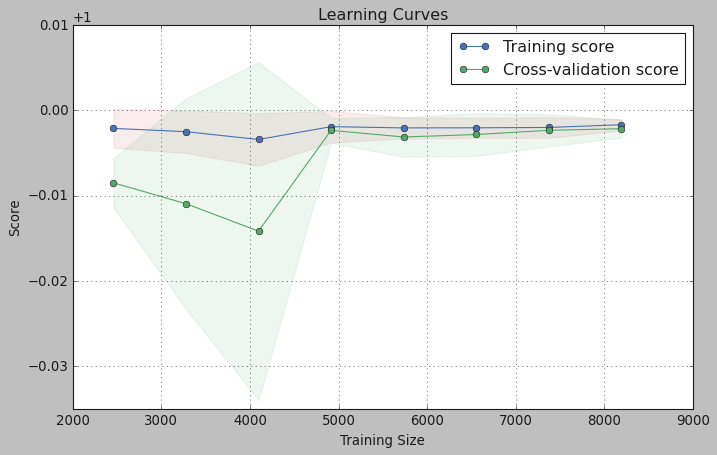

In [89]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(svm, x, y, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        scoring='accuracy')

# Tính trung bình và độ lệch chuẩn của điểm số trên các lần chia
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()
plt.style.use('classic')

Không có dấu hiệu của overfitting hay underfitting, mô hình tổng quát hóa tốt ngay từ đầu.

# KNeighborsClassifier

Lý do chọn mô hình: KNN đơn giản và không yêu cầu giả định về phân phối của dữ liệu, có thể phù hợp với việc xác định nhóm khách hàng dựa trên hành vi mua hàng tương tự

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# Assuming x_train, x_test, y_train, y_test are already defined

# Standardizing the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the KNN model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Making predictions
y_predicted_knn = knn.predict(x_test)

print("K-Nearest Neighbors (KNN) Results:")
print("-" * 100)
print()

# Calculating and printing accuracy score
acc_knn = accuracy_score(y_test, y_predicted_knn)
print("Accuracy Score (KNN): ", acc_knn)
print("-" * 100)
print()

# Calculating and printing F1 score
f1_knn = f1_score(y_test, y_predicted_knn, average='weighted')  # Use 'average' if dealing with multiclass
print("F1 Score (KNN): ", f1_knn)
print("-" * 100)
print()

# Generating and printing the confusion matrix
cm_knn = confusion_matrix(y_test, y_predicted_knn)
cm_df = pd.DataFrame(cm_knn, index=[f'Actual {i}' for i in range(len(cm_knn))], columns=[f'Predicted {i}' for i in range(len(cm_knn))])
print("Confusion Matrix (KNN):")
print(cm_df)
print("-" * 100)
print()

# Printing the classification report
print("Classification Report (KNN): \n", classification_report(y_test, y_predicted_knn))
print("-" * 100)


K-Nearest Neighbors (KNN) Results:
----------------------------------------------------------------------------------------------------

Accuracy Score (KNN):  0.95361328125
----------------------------------------------------------------------------------------------------

F1 Score (KNN):  0.9535897947041988
----------------------------------------------------------------------------------------------------

Confusion Matrix (KNN):
          Predicted 0  Predicted 1
Actual 0         1125           44
Actual 1           51          828
----------------------------------------------------------------------------------------------------

Classification Report (KNN): 
               precision    recall  f1-score   support

           1       0.96      0.96      0.96      1169
           2       0.95      0.94      0.95       879

    accuracy                           0.95      2048
   macro avg       0.95      0.95      0.95      2048
weighted avg       0.95      0.95      0.95      204

Mô hình KNN hoạt động hiệu quả trong việc phân loại khách hàng thành hai nhóm: Highly Active Customer và Least Active Customer. Các chỉ số đo lường đều cao, cho thấy mô hình không chỉ chính xác mà còn cân bằng tốt giữa việc dự đoán đúng và phản ứng với tất cả các nhóm khách hàng. Điều này chứng tỏ mô hình KNN là một công cụ mạnh mẽ và hiệu quả trong việc phân loại hành vi mua hàng của khách hàng.

### Kiểm tra overfiting

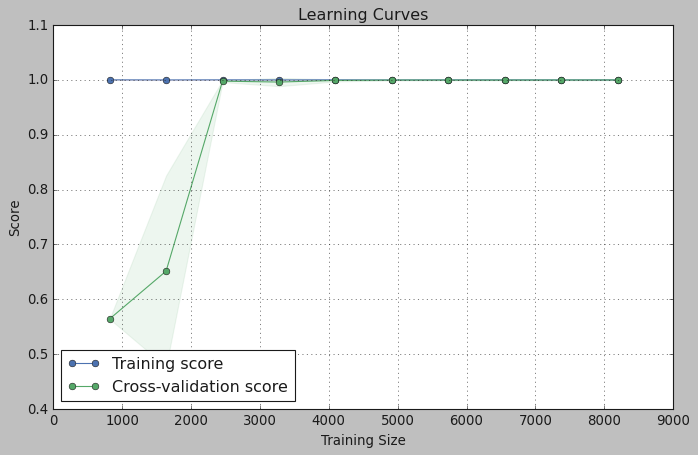

In [85]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(knn, x, y, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        scoring='accuracy')

# Tính trung bình và độ lệch chuẩn của điểm số trên các lần chia
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()
plt.style.use('classic')

Ban đầu có dấu hiệu underfitting nhưng cải thiện nhanh chóng và không có overfitting khi kích thước tập huấn luyện tăng.

# LogisticRegression

Lý do chọn mô hình: Logistic Regression thường được sử dụng trong các vấn đề phân loại nhị phân và cung cấp xác suất dự đoán, phù hợp với bài toán này.

In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# Assuming x_train, x_test, y_train, y_test are already defined

# Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Making predictions
y_predicted = log_reg.predict(x_test)

print("Logistic Regression Results:")
print("-" * 100)
print()

# Printing the classification report
print("Classification Report: \n", classification_report(y_test, y_predicted))
print("-" * 100)
print()

# Calculating and printing accuracy score
acc = accuracy_score(y_test, y_predicted)
print("Accuracy Score: ", acc)
print("-" * 100)
print()

# Calculating and printing F1 score
f1 = f1_score(y_test, y_predicted, average='weighted')  # Use 'average' if dealing with multiclass
print("F1 Score: ", f1)
print("-" * 100)
print()

# Generating and printing the confusion matrix
cm = confusion_matrix(y_test, y_predicted)
cm_df = pd.DataFrame(cm, index=[f'Actual {i}' for i in range(len(cm))], columns=[f'Predicted {i}' for i in range(len(cm))])
print("Confusion Matrix:")
print(cm_df)
print("-" * 100)


Logistic Regression Results:
----------------------------------------------------------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1169
           2       1.00      0.99      1.00       879

    accuracy                           1.00      2048
   macro avg       1.00      1.00      1.00      2048
weighted avg       1.00      1.00      1.00      2048

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9970703125
----------------------------------------------------------------------------------------------------

F1 Score:  0.9970694737893842
----------------------------------------------------------------------------------------------------

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         1168            1
Actual 1            5          874
----------------------------

Mô hình Logistic Regression hoạt động cực kỳ hiệu quả trong việc phân loại khách hàng thành hai nhóm: Highly Active Customer và Least Active Customer. Các chỉ số đo lường đều gần như hoàn hảo, cho thấy mô hình không chỉ chính xác mà còn có sự cân bằng tốt giữa việc dự đoán đúng và phản ứng với tất cả các nhóm khách hàng. Điều này chứng tỏ mô hình Logistic Regression là một công cụ mạnh mẽ và hiệu quả trong việc phân loại hành vi mua hàng của khách hàng.

### Kiểm tra overfiting

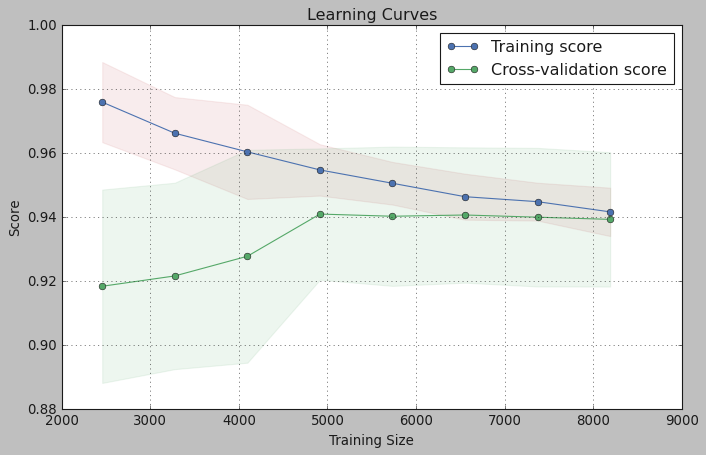

In [87]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(log_reg, x, y, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        scoring='accuracy')

# Tính trung bình và độ lệch chuẩn của điểm số trên các lần chia
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()
plt.style.use('classic')

Ban đầu có dấu hiệu overfitting nhưng giảm dần khi kích thước tập huấn luyện tăng.

## So sánh các mô hình

C:\Users\MSI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\MSI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\MSI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\MSI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\MSI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be r

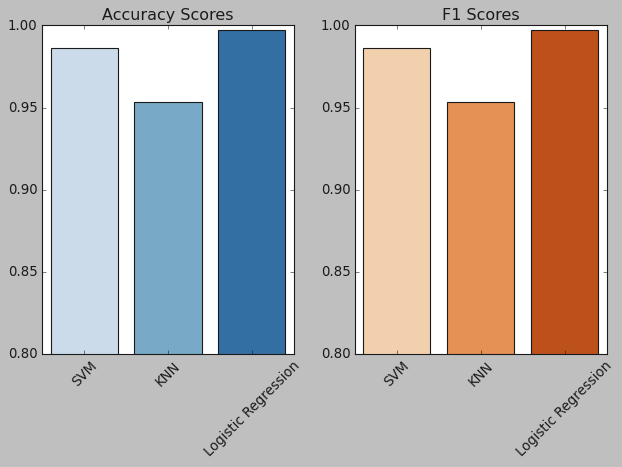

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
models = ['SVM', 'KNN', 'Logistic Regression']
accuracy_scores = [acc_svm, acc_knn, acc]
f1_scores = [f1_svm, f1_knn, f1]


# Accuracy Scores
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy_scores, palette="Blues")
plt.title('Accuracy Scores')
plt.ylim(0.8, 1)
plt.xticks(rotation=45)  # Xoay nhãn trục x 45 độ

# F1 Scores
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=f1_scores, palette="Oranges")
plt.title('F1 Scores')
plt.ylim(0.8, 1)
plt.xticks(rotation=45)  # Xoay nhãn trục x 45 độ

plt.tight_layout()
plt.show()
plt.style.use('classic')

Có thể thấy các mô hình đều có độ chính xác cao và điểm f1 cũng cao, thể hiện các mô hình hoạt động rất tốt trên tập dữ liệu, cũng như các biểu đồ trực quan hóa cho thấy việc tăng kích thước tập huấn luyện giúp giảm thiểu overfitting trong đồ thị 1 và underfitting trong đồ thị 2, trong khi đồ thị 3 cho thấy một mô hình mạnh mẽ với khả năng tổng quát hóa tốt ngay từ đầu..

# Ưu và nhược điểm:

**1. Support Vector Machine (SVM):**
+ NNguyên tắc: Tìm đường phân cách tối ưu (hyperplane) giữa các nhóm dữ liệu
+ 
Ưu điểm: Hiệu quả trong xử lý dữ liệu có chiều cao, khả năng tổng quát hóa tốt, xử lý tốt dữ liệu phi tuyến tính (khi sử dụng kernel
+ .
Nhược điểm: Có thể gặp khó khăn trong xử lý các tập dữ liệu rất lớn, việc lựa chọn kernel phù hợp có thể phức tàng của khách hàng.

**2. K-Nearest Neighbors (KNN):**
+ Nguyên tắc: Dự đoán nhãn của một điểm dựa trên nhãn của các điểm gần nhất (k điểm lân cận).
+ Ưu điểm: Dễ dàng triển khai, hiệu quả trong các trường hợp dữ liệu có cấu trúc phức tạp.
+ Nhược điểm: Có thể bị ảnh hưởng bởi sự hiện diện của dữ liệu nhiễu, cần lựa chọn k phù hợp, tính toán có thể chậm với tập dữ liệu lớn.

**3. Logistic Regression:**
+ Nguyên tắc: Sử dụng hàm sigmoid để dự đoán xác suất thuộc về một lớp cụ thể.
+ Ưu điểm: Dễ hiểu, dễ giải thích, hiệu quả trong việc xử lý dữ liệu tuyến tính.
+ Nhược điểm: Có thể gặp khó khăn trong xử lý dữ liệu phi tuyến tính.

### Ý nghĩa mô hình:

Bài toán này có ý nghĩa thực tế rất lớn cho doanh nghiệp, đặc biệt trong lĩnh vực kinh doanh trực tuyến, giúp họ:
1. Hiểu rõ hành vi khách hàng:
Phân loại khách hàng: Xác định khách hàng tích cực và khách hàng ít hoạt động dựa trên hành vi mua hàng.
Nhận diện nhu cầu: Phân tích hành vi của từng nhóm khách hàng để hiểu rõ nhu cầu, sở thích và động lực mua hàng.
Xây dựng chiến lược marketing phù hợp: Tập trung vào những nhóm khách hàng tiềm năng, tạo ra các chương trình khuyến mãi, ưu đãi phù hợp với từng nhóm.
2. Tăng hiệu quả kinh doanh:
Tối ưu hóa chi phí marketing: Tập trung vào các nhóm khách hàng có khả năng mua hàng cao, hạn chế lãng phí vào những khách hàng ít tiềm năng.
Tăng doanh thu: Dự đoán hoạt động mua hàng giúp doanh nghiệp tập trung vào các chiến lược thúc đẩy mua hàng cho khách hàng tiềm năng.
Cải thiện tỷ lệ chuyển đổi: Xây dựng các chiến lược marketing và bán hàng phù hợp với từng nhóm khách hàng, giúp tăng tỷ lệ chuyển đổi từ khách hàng tiềm năng thành khách hàng thực tế.
3. Nâng cao trải nghiệm khách hàng:
Cá nhân hóa dịch vụ: Cung cấp các dịch vụ và thông tin phù hợp với nhu cầu của từng nhóm khách hàng.
Tăng sự hài lòng: Tạo ra những trải nghiệm mua hàng tích cực, giúp khách hàng cảm thấy được tôn trọng và quan tâm.
Thúc đẩy lòng trung thành: Xây dựng mối quan hệ lâu dài với khách hàng bằng cách cung cấp những giá trị phù hợp với nhu cầu của họ.
Ví dụ ứng dụng:
Cửa hàng thời trang trực tuyến: Phân loại khách hàng theo phong cách thời trang, sở thích mua hàng để đưa ra các khuyến mãi và sản phẩm phù hợp.
Nền tảng thương mại điện tử: Dự đoán nhu cầu mua hàng của khách hàng để giới thiệu sản phẩm phù hợp, cá nhân hóa trải nghiệm mua sắm.
Công ty dịch vụ du lịch: Phân loại khách hàng theo nhu cầu du lịch, giới thiệu các tour du lịch phù hợp với sở thích và  nghiệm khách hàng.